# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Reading the dataset

In [2]:
orig = pd.read_csv('Arrest_Data_from_2020_to_Present.csv')

# Dropping unnecessary columns

In [3]:
df = orig.drop(['Report ID','Area ID','Reporting District','Charge Group Code','Charge','Disposition Description','Address','Cross Street','Location','Booking Date','Booking Time','Booking Location','Booking Location Code'], axis=1)
df = df.dropna()
df.isnull().sum()

Report Type                 0
Arrest Date                 0
Time                        0
Area Name                   0
Age                         0
Sex Code                    0
Descent Code                0
Charge Group Description    0
Arrest Type Code            0
Charge Description          0
LAT                         0
LON                         0
dtype: int64

# Converting Date string to Datetime object

In [4]:
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])

df['Day'] = df['Arrest Date'].dt.day
df['Month'] = df['Arrest Date'].dt.month
df['Year'] = df['Arrest Date'].dt.year

# Cleaning dataset

In [5]:
df = df[(df['Age'] != 0) & (df['LAT'] != 0)]
df.to_csv('Cleaned.csv', index = False, index_label = False)
df = pd.read_csv('Time_processed.csv', index_col= 0)

In [6]:
df.columns = df.columns.str.replace('.',' ')

# Group by multiple variables

In [7]:
df.groupby(['Area Name','Charge Group Description','Charge Description'])['Report Type'].count().sort_values(ascending = False).reset_index()

,Area Name,Charge Group Description,Charge Description,Report Type
0,Topanga,Liquor Laws,DRINKING ALCOHOL,453
1,Van Nuys,Driving Under Influence,DRUNK DRIVING ALCOHOL/DRUGS,427
2,77th Street,Aggravated Assault,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,426
3,Newton,Vehicle Theft,TAKE VEHICLE W/O OWNER'S CONSENT,358
4,Mission,Driving Under Influence,DRUNK DRIVING ALCOHOL/DRUGS,350
...,...,...,...,...
5765,Hollenbeck,Sex (except rape/prst),LEWD/ACTS W/CHILD BY PRSON W/10 YR DIFRNC,1
5766,Hollenbeck,Sex (except rape/prst),L & L ACTS WITH CHILD < 14 W/ FORCE/ETC,1
5767,Rampart,Miscellaneous Other Violations,REFUSE TO LEAVE PRIVATE PROPERTY,1
5768,Hollenbeck,Sex (except rape/prst),CONTINUOUS SEXUAL ABUSE AGAINST CHILD,1


# Correlation Heatmap

Text(0.5, 1, 'Correlation Heatmap')

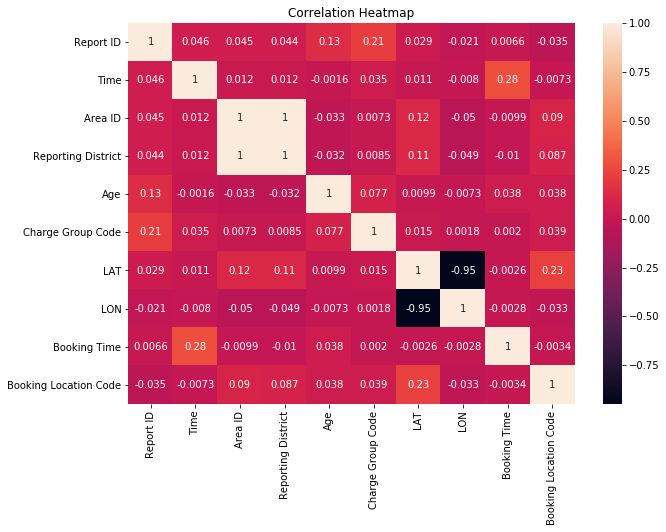

In [8]:
cor = orig.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor,annot=True).set_title('Correlation Heatmap')

# Histogram - Age Group

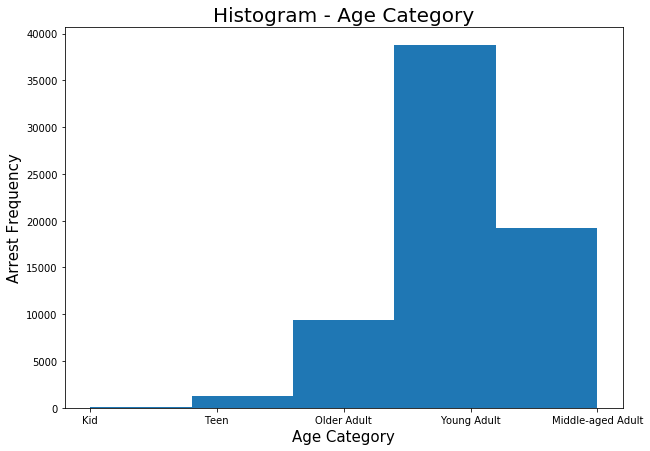

In [9]:
bins= [0,10,17,35,50,110]
plt.figure(figsize = (10,7))
labels = ['Kid','Teen','Young Adult','Middle-aged Adult','Older Adult']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
plt.hist(df['AgeGroup'], bins=5)
plt.xlabel('Age Category', fontsize = 15)
plt.ylabel('Arrest Frequency', fontsize = 15)
plt.title('Histogram - Age Category', fontsize = 20)
plt.gca().invert_xaxis()

# Filtering based on age between 18-35 yrs 

In [11]:
age_based = df[(df['Age'] >= 18) & (df['Age'] <= 35)]

In [12]:
crime = pd.DataFrame(age_based.groupby('Charge Group Description')['Age'].count().sort_values(ascending = False).head(15)).reset_index()
crime

,Charge Group Description,Age
0,Miscellaneous Other Violations,6208
1,Aggravated Assault,5292
2,Driving Under Influence,4090
3,Narcotic Drug Laws,3911
4,Other Assaults,3572
5,Weapon (carry/poss),2921
6,Vehicle Theft,2740
7,Prostitution/Allied,1897
8,Burglary,1645
9,Robbery,1487


In [13]:
miscell = df[(df['Age'] >= 18) & (df['Age'] <= 35) & (df['Charge Group Description'] == 'Miscellaneous Other Violations')]
high_crime = pd.DataFrame(miscell.groupby('Charge Description')['Age'].count().sort_values(ascending = False).head(10)).reset_index()
high_crime

,Charge Description,Age
0,VANDALISM W/LOSS VALUED EQ OR > $400,570
1,WARRANT-PETITION TO REVOKE COMMUNITY SUPVN,444
2,PAROLE WARRANT,394
3,DEFACE PROPERTY,345
4,VIOL DOMESTIC VIOL PROTECT/STAY AWAY ORD,257
5,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,242
6,VIOLATION OF PAROLE:FELONY,223
7,VANDALISM,204
8,VIOL OF CURFEW DURING STATE OF EMER,202
9,LOS ANGELES MUNICIPAL CODE,177


In [14]:
aggrav = df[(df['Age'] >= 18) & (df['Age'] <= 35) & (df['Charge Group Description'] == 'Aggravated Assault')]
next_crime = pd.DataFrame(aggrav.groupby('Charge Description')['Age'].count().sort_values(ascending = False).head(10)).reset_index()
next_crime

,Charge Description,Age
0,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,2805
1,"ADW, NOT FIREARM, W/GBI",1257
2,ADW W/FIREARM,220
3,ASSAULT LIKELY TO PRODUCE GBI,205
4,ATTEMPT - MURDER,205
5,BATTERY W/GBI,156
6,CRUEL TO CHILD LIKELY TO PROD GBI/DEATH,91
7,"INJURING A SPOUSE/COHABITANT, ETC W/PRIOR",63
8,ADW PO/FIREMAN W/O FIREARM/GBI,58
9,CAUSE HARM/DEATH OF ELDER/DEPEND ADULT,39


# Barplot - Age Group

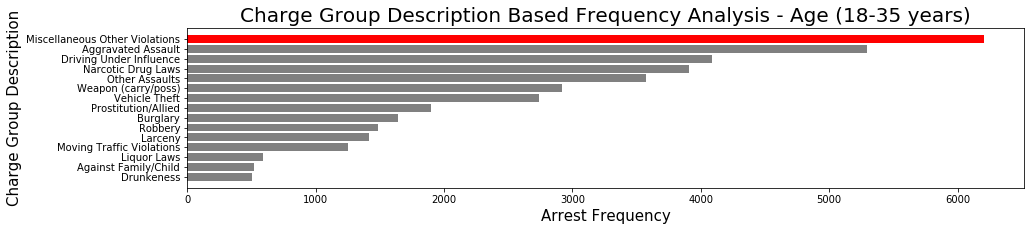

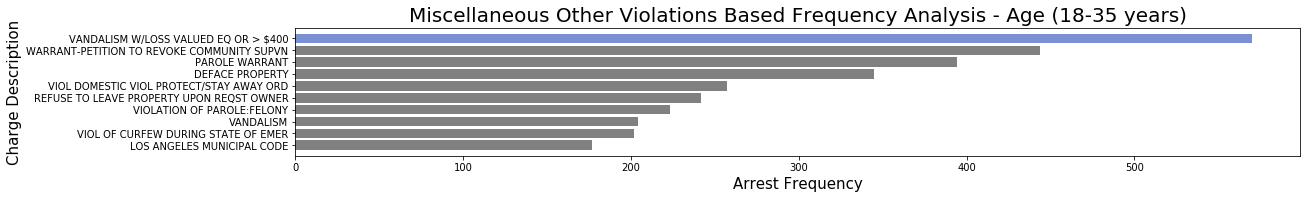

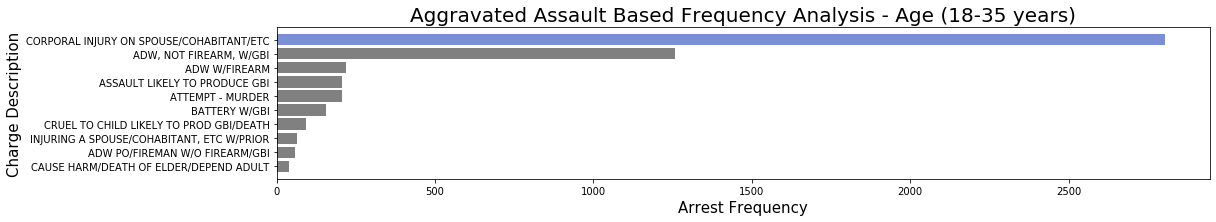

In [15]:
hl = ['grey' if (x != 'Miscellaneous Other Violations') else 'red' for x in crime['Charge Group Description'] ]
plt.figure(figsize=(15,10))
plt.subplot(3, 1, 1)
plt.barh(crime['Charge Group Description'], crime['Age'], color=hl)
plt.ylabel('Charge Group Description', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Charge Group Description Based Frequency Analysis - Age (18-35 years)', fontsize = 20)
plt.gca().invert_yaxis()

hl1 = ['grey' if (x < max(high_crime['Age'])) else '#7991d3' for x in high_crime['Age'] ]
plt.figure(figsize=(18,8))
plt.subplot(3, 1, 2)
plt.barh(high_crime['Charge Description'], high_crime['Age'], color=hl1, label = 'Descent Code')
plt.ylabel('Charge Description', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Miscellaneous Other Violations Based Frequency Analysis - Age (18-35 years)', fontsize = 20)
plt.gca().invert_yaxis()

hl2 = ['grey' if (x < max(next_crime['Age'])) else '#7991d3' for x in next_crime['Age'] ]
plt.figure(figsize=(17,8))
plt.subplot(3,1,3)
plt.barh(next_crime['Charge Description'], next_crime['Age'], color=hl2)
plt.ylabel('Charge Description', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Aggravated Assault Based Frequency Analysis - Age (18-35 years)', fontsize = 20)
plt.gca().invert_yaxis()

plt.tight_layout()

# Descent Groupby

In [16]:
descent = pd.DataFrame(df.groupby('Descent Code')['Charge Group Description'].count().sort_values(ascending = False).head(15)).reset_index()
descent

,Descent Code,Charge Group Description
0,H,35352
1,B,19485
2,W,10091
3,O,3408
4,A,139
5,K,41
6,F,31
7,C,29
8,G,14
9,P,7


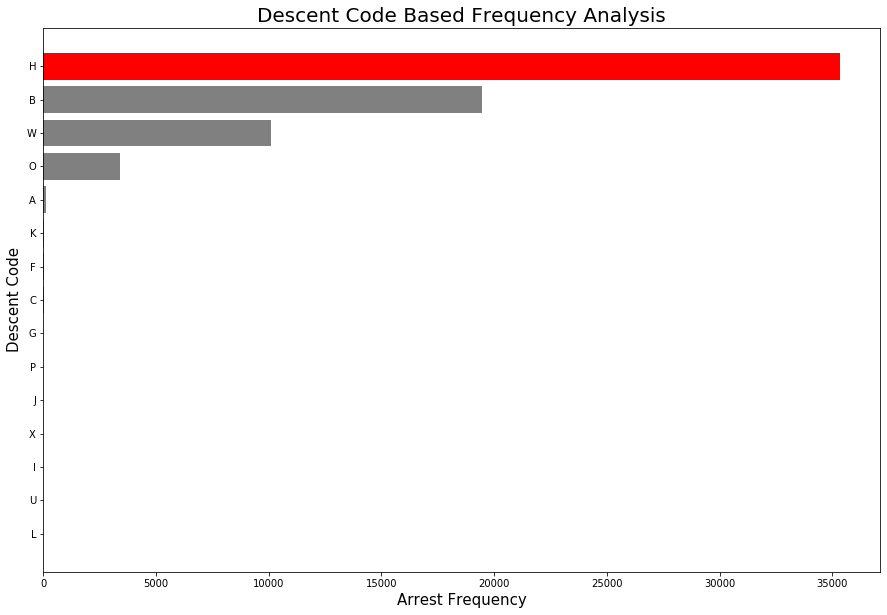

In [17]:
hl3 = ['grey' if (x < max(descent['Charge Group Description'])) else 'red' for x in descent['Charge Group Description'] ]
plt.figure(figsize=(15,10))
plt.barh(descent['Descent Code'],descent['Charge Group Description'], color=hl3)
plt.ylabel('Descent Code', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Descent Code Based Frequency Analysis', fontsize = 20)
plt.gca().invert_yaxis()

In [18]:
high_desc = df[df['Descent Code'] == 'H']
desc_crime = pd.DataFrame(high_desc.groupby('Charge Group Description')['Descent Code'].count().sort_values(ascending = False).head(10)).reset_index()
desc_crime

,Charge Group Description,Descent Code
0,Miscellaneous Other Violations,5444
1,Aggravated Assault,4661
2,Driving Under Influence,4482
3,Narcotic Drug Laws,3117
4,Other Assaults,3090
5,Vehicle Theft,2628
6,Weapon (carry/poss),1870
7,Moving Traffic Violations,1188
8,Burglary,1134
9,Drunkeness,1099


In [19]:
desc_mis = df[(df['Descent Code'] == 'H') & (df['Charge Group Description'] == 'Miscellaneous Other Violations')]
desc_spec = pd.DataFrame(desc_mis.groupby('Charge Description')['Descent Code'].count().sort_values(ascending = False).head(10)).reset_index()
desc_spec

,Charge Description,Descent Code
0,VANDALISM W/LOSS VALUED EQ OR > $400,485
1,WARRANT-PETITION TO REVOKE COMMUNITY SUPVN,441
2,PAROLE WARRANT,349
3,DEFACE PROPERTY,329
4,VIOL DOMESTIC VIOL PROTECT/STAY AWAY ORD,287
5,VANDALISM,198
6,REFUSE TO LEAVE PROPERTY UPON REQST OWNER,162
7,VIOL OF CURFEW DURING STATE OF EMER,159
8,VIOLATION OF PAROLE:FELONY,146
9,LOS ANGELES MUNICIPAL CODE,145


In [20]:
desc_aggr = df[(df['Descent Code'] == 'H') & (df['Charge Group Description'] == 'Aggravated Assault')]
desc_sp = pd.DataFrame(desc_aggr.groupby('Charge Description')['Descent Code'].count().sort_values(ascending = False).head(10)).reset_index()
desc_sp

,Charge Description,Descent Code
0,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,2406
1,"ADW, NOT FIREARM, W/GBI",1213
2,ADW W/FIREARM,183
3,ASSAULT LIKELY TO PRODUCE GBI,175
4,ATTEMPT - MURDER,164
5,BATTERY W/GBI,102
6,CRUEL TO CHILD LIKELY TO PROD GBI/DEATH,67
7,"INJURING A SPOUSE/COHABITANT, ETC W/PRIOR",65
8,ADW PO/FIREMAN W/O FIREARM/GBI,48
9,CAUSE HARM/DEATH OF ELDER/DEPEND ADULT,36


# Barplot - Descent Code

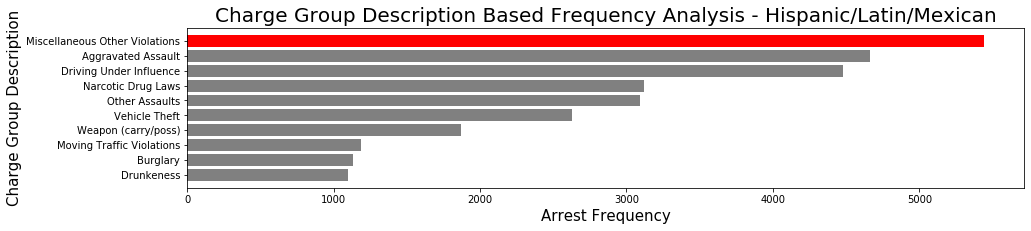

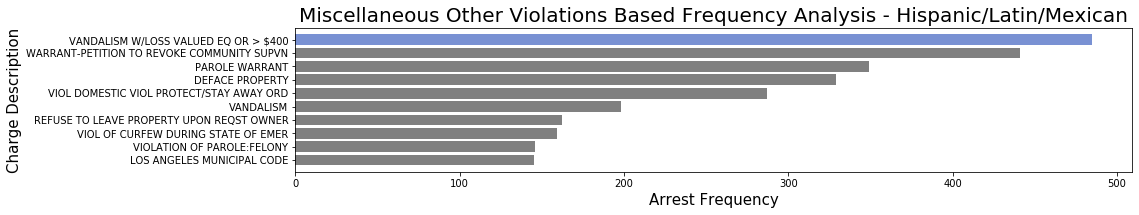

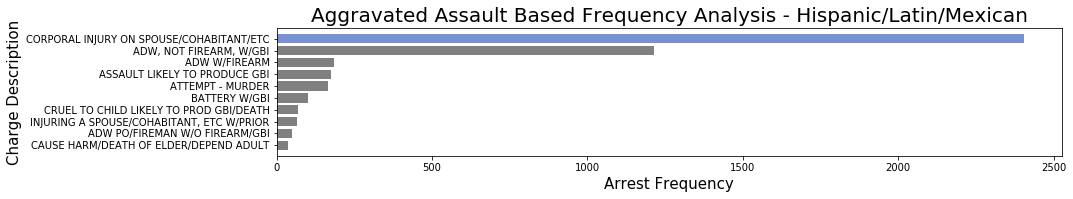

In [21]:
hl4 = ['grey' if (x < max(desc_crime['Descent Code'])) else 'red' for x in desc_crime['Descent Code'] ]
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.barh(desc_crime['Charge Group Description'], desc_crime['Descent Code'], color=hl4)
plt.ylabel('Charge Group Description', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Charge Group Description Based Frequency Analysis - Hispanic/Latin/Mexican', fontsize = 20)
plt.gca().invert_yaxis()

hl5 = ['grey' if (x < max(desc_spec['Descent Code'])) else '#7991d3' for x in desc_spec['Descent Code'] ]
plt.figure(figsize=(15,9))
plt.subplot(3,1,2)
plt.barh(desc_spec['Charge Description'], desc_spec['Descent Code'], color=hl5)
plt.ylabel('Charge Description', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Miscellaneous Other Violations Based Frequency Analysis - Hispanic/Latin/Mexican', fontsize = 20)
plt.gca().invert_yaxis()

hl6 = ['grey' if (x < max(desc_sp['Descent Code'])) else '#7991d3' for x in desc_sp['Descent Code'] ]
plt.figure(figsize=(15,7))
plt.subplot(3,1,3)
plt.barh(desc_sp['Charge Description'], desc_sp['Descent Code'], color=hl6)
plt.ylabel('Charge Description', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Aggravated Assault Based Frequency Analysis - Hispanic/Latin/Mexican', fontsize = 20)
plt.gca().invert_yaxis()

plt.tight_layout()

Text(0.5, 1.0, 'Driving Under Influence (DUI) Based Analysis for 2020')

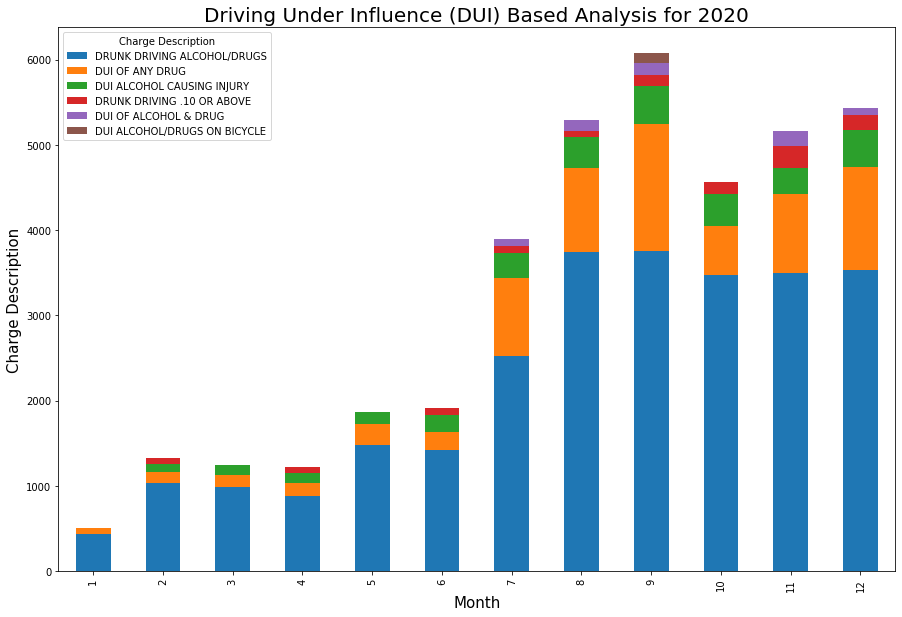

In [22]:
dui = df[(df['Charge Group Description'] == 'Driving Under Influence') & (df['Year'] == 2020)]
high_dui = dui.groupby(['Month','Charge Description'])['Month'].sum().sort_values(ascending = False).head(50)
high_dui.unstack().plot(kind='bar', figsize=(15,10), stacked=True)
plt.ylabel('Charge Description', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.title('Driving Under Influence (DUI) Based Analysis for 2020', fontsize = 20)


# Time Series Analysis

Text(0.5, 1.0, 'Time Series Analysis for Other Assaults')

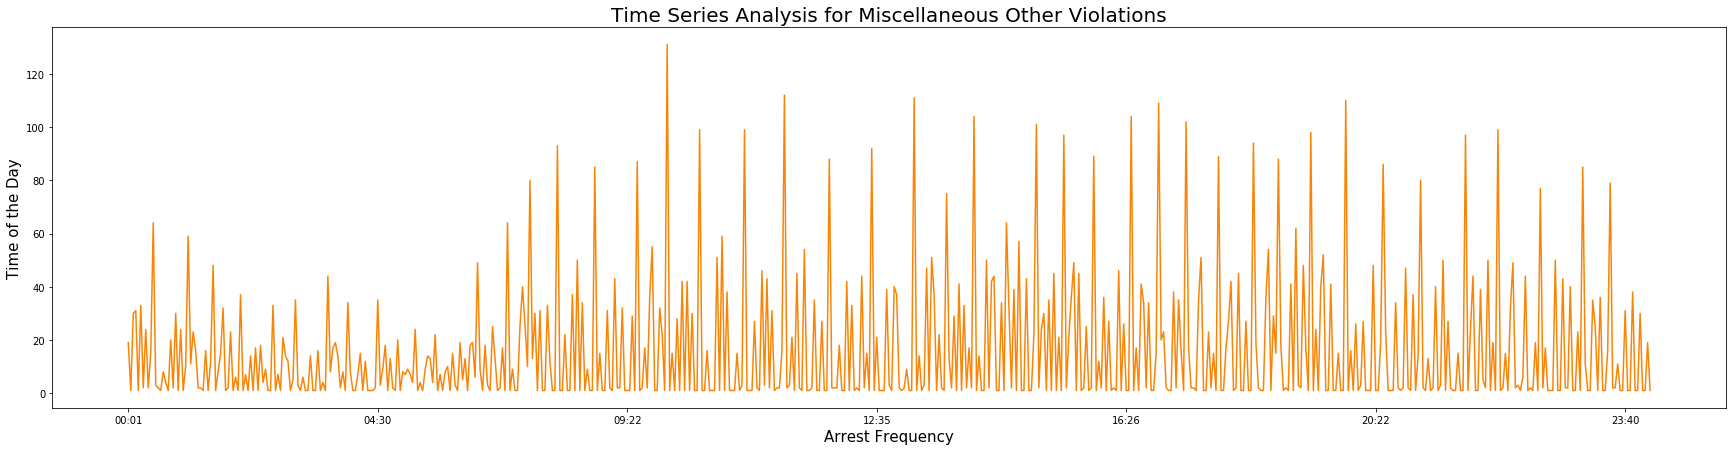

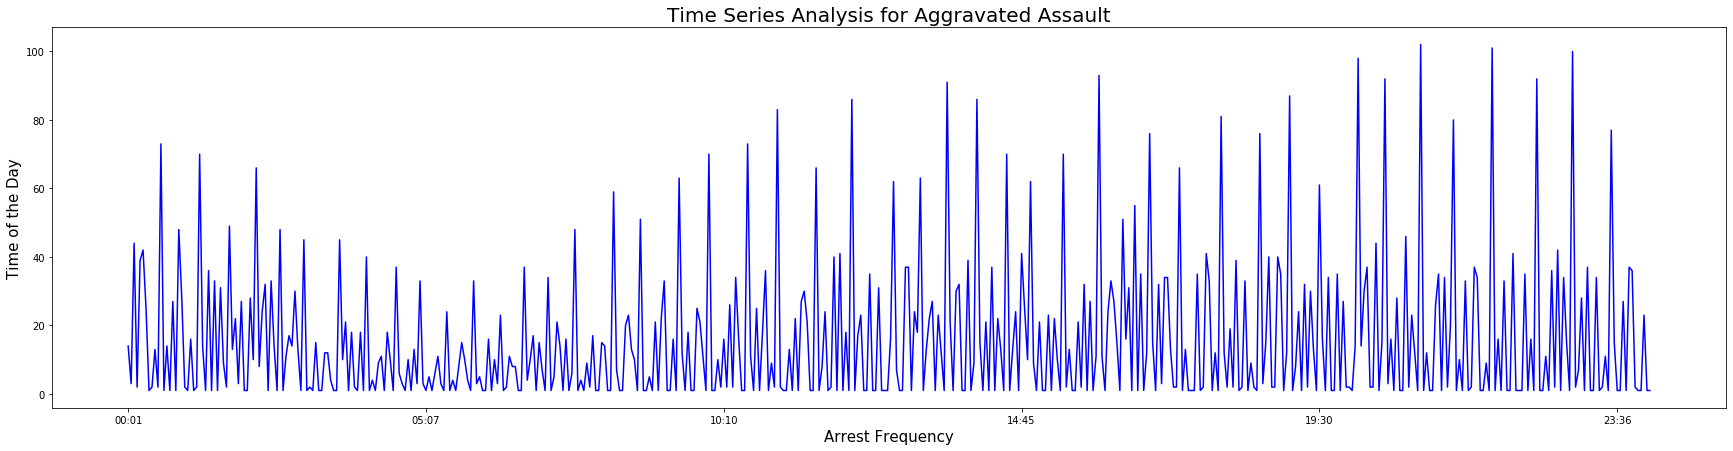

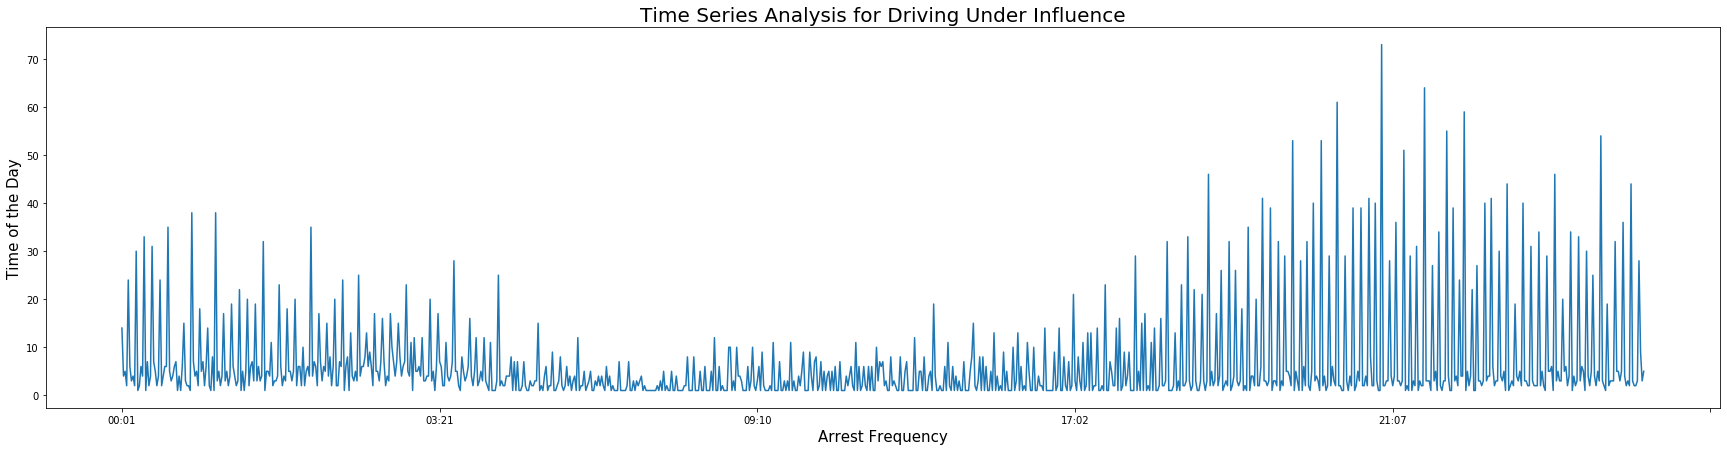

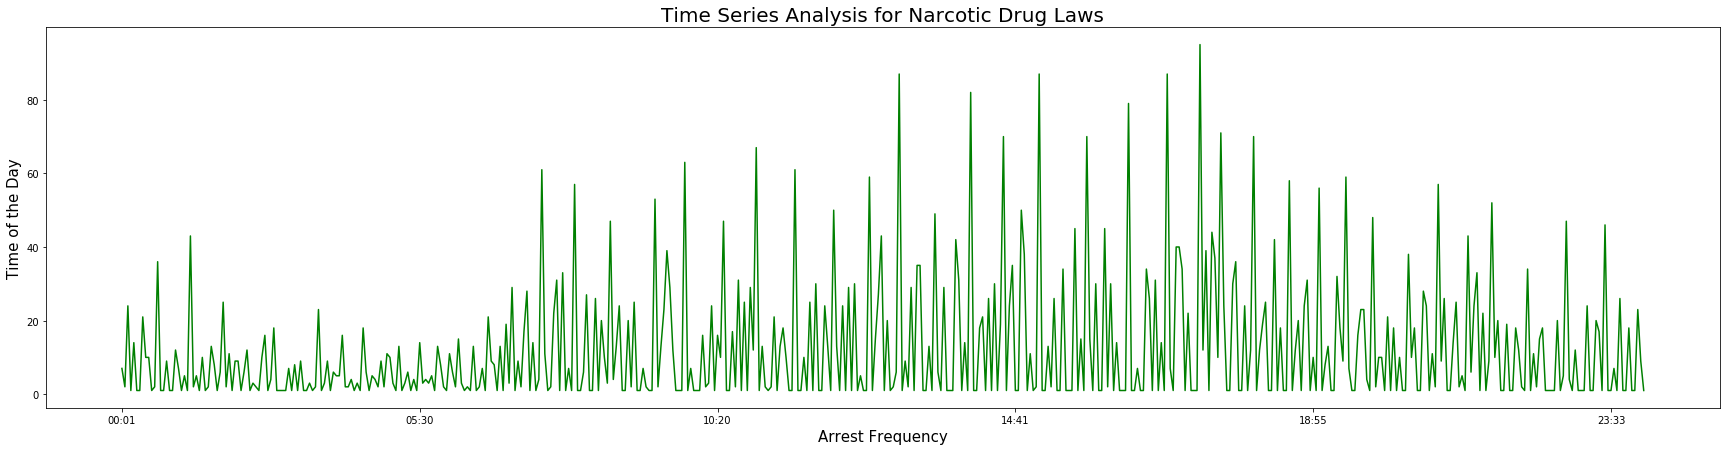

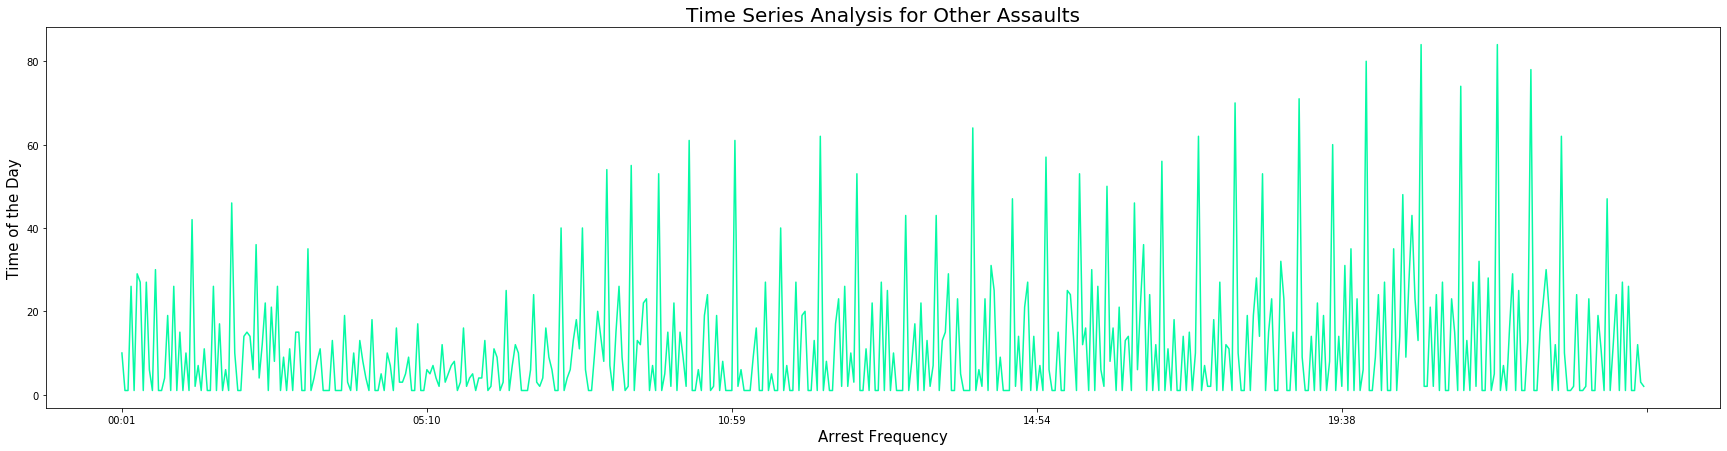

In [23]:
hourM = df[(df['Year'] == 2020) & (df['Charge Group Description'] == 'Miscellaneous Other Violations')]
hrM = hourM.groupby(['Time', 'Charge Group Description']).count()['Report Type'].unstack().plot(figsize = (30,7), color = '#fa8405').get_legend().remove()
plt.ylabel('Time of the Day', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Time Series Analysis for Miscellaneous Other Violations', fontsize = 20)

hourA = df[(df['Year'] == 2020) & (df['Charge Group Description'] == 'Aggravated Assault')]
hrA = hourA.groupby(['Time', 'Charge Group Description']).count()['Report Type'].unstack().plot(figsize = (30,7), color = 'blue').get_legend().remove()
plt.ylabel('Time of the Day', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Time Series Analysis for Aggravated Assault', fontsize = 20)

hourD = df[(df['Year'] == 2020) & (df['Charge Group Description'] == 'Driving Under Influence')]
hrD = hourD.groupby(['Time', 'Charge Group Description']).count()['Report Type'].unstack().plot(figsize = (30,7)).get_legend().remove()
plt.ylabel('Time of the Day', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Time Series Analysis for Driving Under Influence', fontsize = 20)

hourN = df[(df['Year'] == 2020) & (df['Charge Group Description'] == 'Narcotic Drug Laws')]
hrN = hourN.groupby(['Time', 'Charge Group Description']).count()['Report Type'].unstack().plot(figsize = (30,7), color = 'green').get_legend().remove()
plt.ylabel('Time of the Day', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Time Series Analysis for Narcotic Drug Laws', fontsize = 20)

hourO = df[(df['Year'] == 2020) & (df['Charge Group Description'] == 'Other Assaults')]
hrO = hourO.groupby(['Time', 'Charge Group Description']).count()['Report Type'].unstack().plot(figsize = (30,7), color = '#05faa4').get_legend().remove()
plt.ylabel('Time of the Day', fontsize = 15)
plt.xlabel('Arrest Frequency', fontsize = 15)
plt.title('Time Series Analysis for Other Assaults', fontsize = 20)
